In [1]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.2.4'

In [2]:
#이미지가 저장된 디렉토리 불러오기
data_dir = '/Users/joannakang/Desktop/kakaoclassification'

In [4]:
#os.listdir = 경로 내의 파일명을 리스트화 시킨다
#ds.store 파일 생겼을때 : sudo find / -name ".DS_Store" -depth -exec rm {} \;
class_name = os.listdir(data_dir)
print(class_name)

['Apeach', 'Muzi_con', 'Jay']


In [5]:
train_input = []
train_label = []

In [21]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [25]:
#class_name 의 리스트 갯수만큼 for문을 반복
#class_name 리스트에 있는 이름 순서대로 Index에 이름이 들어가면서 for문이 실행됨
for index in range(len(class_name)):
    path = os.path.join(data_dir, class_name[index])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((28, 28, 1))
        train_input.append(img)
        train_label.append(onehot_encoded[index])

In [13]:
list(range(len(class_name)))
print(class_name[0])
print(os.path.join(data_dir,class_name[0]))

Apeach
/Users/joannakang/Desktop/kakaoclassification/Apeach


In [26]:
print(len((train_input)))
print(len(train_label))

71
71


In [27]:
train_input = np.array(train_input)
train_label = np.array(train_label)
train_input.shape

(71, 28, 28, 1)

In [28]:
a = train_input[1].reshape(28, 28)

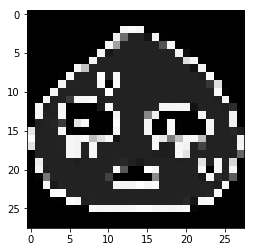

In [29]:
plt.imshow(a, cmap = 'Greys')

In [30]:
print(train_input.shape)
print(train_label.shape)

(71, 28, 28, 1)
(71, 3)


In [31]:
#모델을 구성한다
model = Sequential()
#보통 2의 배수로 숫자 지정 /램 사양에 맞춰서 지정해야함
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2))) #불필요한 빈공간을 지운다

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'sigmoid'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
__________

In [33]:
#binary crossentropy 어려운내용....
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
#batch size = 학습시키는 데이터의 수 #epochs = 학습의 횟수
model.fit(x = train_input, y = train_label, batch_size = 5, epochs = 5)

Epoch 1/5
71/71 [==============================] - 0s 2ms/step - loss: 0.6629 - acc: 0.6667
Epoch 2/5
71/71 [==============================] - 0s 2ms/step - loss: 0.6341 - acc: 0.6620
Epoch 3/5
71/71 [==============================] - 0s 1ms/step - loss: 0.6322 - acc: 0.7606
Epoch 4/5
71/71 [==============================] - 0s 1ms/step - loss: 0.5516 - acc: 0.7700
Epoch 5/5
71/71 [==============================] - 0s 990us/step - loss: 0.4788 - acc: 0.8357


In [37]:
#정확도 / loss
model.evaluate(x = train_input, y = train_label)

71/71 [==============================] - 0s 420us/step


[0.46663058643609706, 0.8215962388146092]